# Survey Analysis on Star Wars Fans
The dataset represents responses from 538's survey of star wars fans. The data has several columns, including the following:
* RespondentID — An anonymized ID for the respondent (person taking the survey)
* Gender — the respondent's gender
* Age — the respondent's age
* Household Income — the respondent's income
* Education — the respondent's education level
* Location (Census Region) — the respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

In [21]:
import warnings

warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [22]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [23]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Cleaning and Mapping Yes/No Columns

In [24]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [25]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We'll convert the survey responses under these columns to boolean value types.

In [26]:
yes_no = {"Yes": True, "No": False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [27]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [28]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Cleaning and Mapping Checkbox Columns
The following columns represent a single checkbox question: Which of the following Star Wars films have you seen? Please select all that apply.
The columns are:
* Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll convert the values in each of these columns to a Boolean, then rename the columns to something more intuitive.

In [29]:
rel_cols = star_wars.columns[3:9]
star_wars[rel_cols].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [30]:
map_dict = {'Star Wars: Episode I  The Phantom Menace':True, np.NaN:False}
star_wars[rel_cols[0]] = star_wars[rel_cols[0]].map(map_dict)

map_dict = {'Star Wars: Episode II  Attack of the Clones':True, np.NaN:False}
star_wars[rel_cols[1]] = star_wars[rel_cols[1]].map(map_dict)

map_dict = {'Star Wars: Episode III  Revenge of the Sith': True, np.NaN: False}
star_wars[rel_cols[2]] = star_wars[rel_cols[2]].map(map_dict)

map_dict = {'Star Wars: Episode IV  A New Hope': True, np.NaN: False}
star_wars[rel_cols[3]] = star_wars[rel_cols[3]].map(map_dict)

map_dict = {'Star Wars: Episode V The Empire Strikes Back': True, np.NaN: False}
star_wars[rel_cols[4]] = star_wars[rel_cols[4]].map(map_dict)

map_dict = {'Star Wars: Episode VI Return of the Jedi': True, np.NaN: False}
star_wars[rel_cols[5]] = star_wars[rel_cols[5]].map(map_dict)

star_wars[rel_cols].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [33]:
rel_cols
columns = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1', 'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'}

star_wars.rename(columns=columns, inplace=True)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning the Ranking Columns
The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:
* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [36]:
# Convert columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [35]:
# Rename columns
rel_cols = star_wars.columns[9:15]
rel_cols

columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1', 'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5', 'Unnamed: 14':'ranking_6'}

star_wars.rename(columns=columns, inplace=True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Finding the Highest-Ranked Movie
 To do this, take the mean of each ranking columns using the pandas.DataFrame.mean() method on DataFrames.

In [37]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [ ]:
['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith',
 'IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']

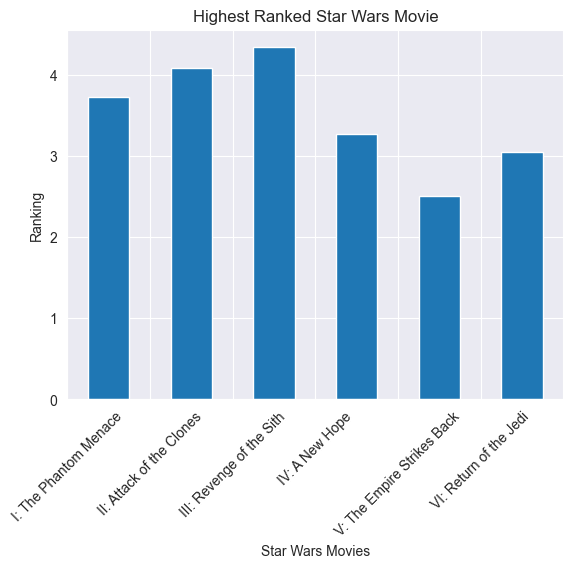

In [52]:
star_wars[star_wars.columns[9:16]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Ranking')
plt.title('Highest Ranked Star Wars Movie')
plt.show()

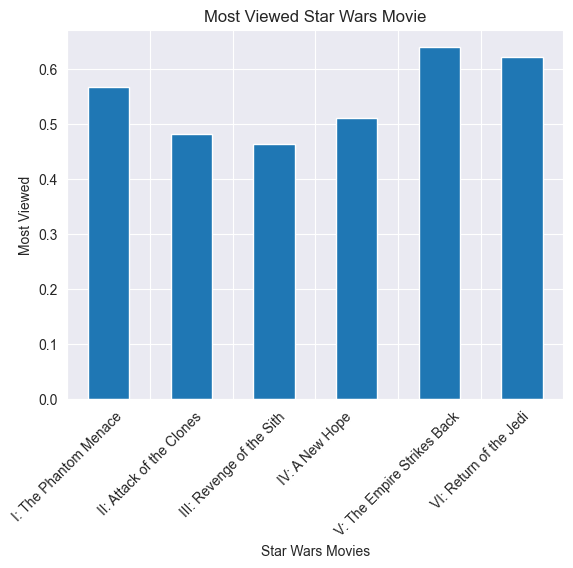

In [55]:
star_wars[star_wars.columns[3:9]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Most Viewed')
plt.title('Most Viewed Star Wars Movie on Average')
plt.show()

Since the lower rankings mean most favourite, The Empire Strikes Back is the most favourite movie in the star wars franchise according to the survey. It is also the most viewed on average of all the movies.

The Empire Strikes Back is still widely considered to be the peak of the Star Wars franchise.

### Finding the Most Viewed Movie


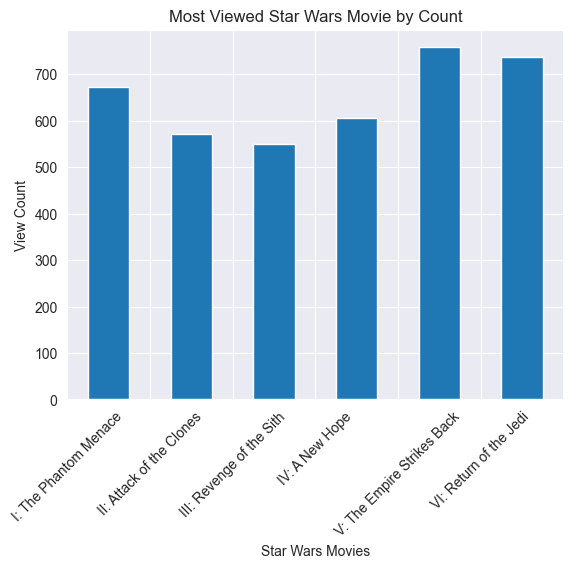

In [58]:
star_wars[star_wars.columns[3:9]].sum().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('View Count')
plt.title('Most Viewed Star Wars Movie by Count')
plt.show()


As shown above, the Empire Strikes back is the most viewed movie in the franchise by count, as nearly all respondents have seen the movie.

### Exploring the Data by Binary Segments
We'll examine how certain segments of the survey population responded. We can split a DataFrame into two groups based on a binary column by creating two subsets of that column.

Some of the binary columns are:
* Do you consider yourself to be a fan of the Star Wars film franchise? — True or False
* Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No
* Gender — Male or Female

We will split the dataset along each binary and conduct analysis on most viewed and highest ranked per group.

### Rankings and Viewings Among Star Wars Fans & Non-Fans

In [72]:
rel_cols = ['Do you consider yourself to be a fan of the Star Wars film franchise?', 'Do you consider yourself to be a fan of the Star Trek franchise?', 'Gender']
star_wars[rel_cols[0]].unique()

sw_fan = star_wars.loc[star_wars[rel_cols[0]] == True]
sw_nonfan = star_wars.loc[star_wars[rel_cols[0]] == False]

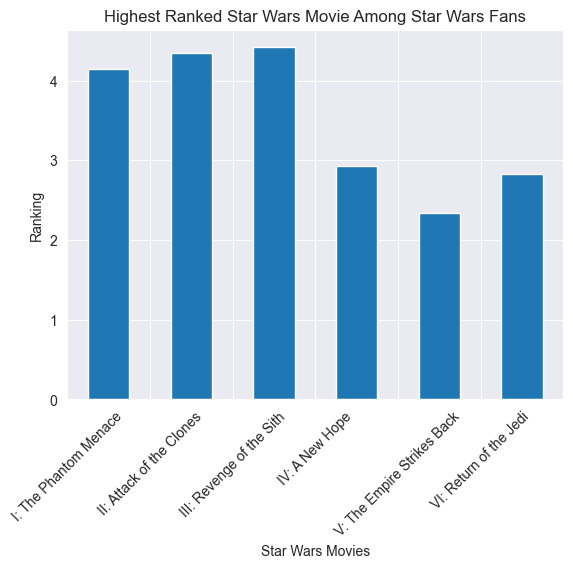

In [73]:
sw_fan[sw_fan.columns[9:16]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Ranking')
plt.title('Highest Ranked Star Wars Movie Among Star Wars Fans')
plt.show()

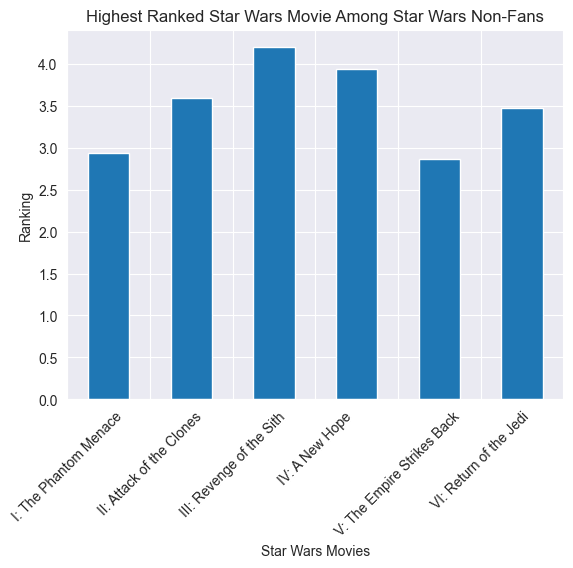

In [75]:
sw_nonfan[sw_nonfan.columns[9:16]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Ranking')
plt.title('Highest Ranked Star Wars Movie Among Star Wars Non-Fans')
plt.show()

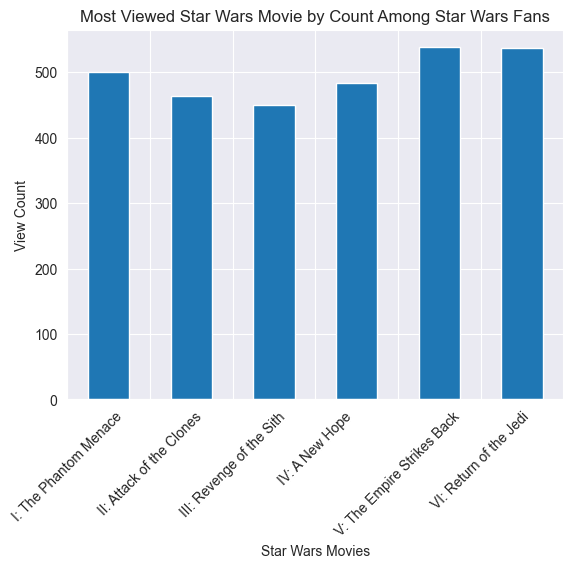

In [74]:
sw_fan[sw_fan.columns[3:9]].sum().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('View Count')
plt.title('Most Viewed Star Wars Movie by Count Among Star Wars Fans')
plt.show()

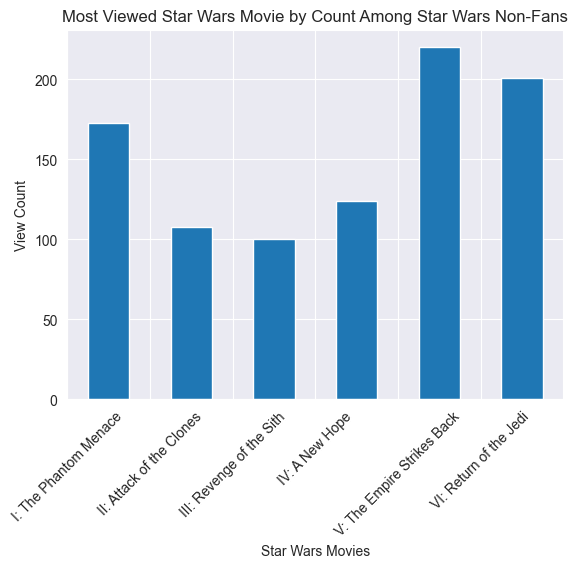

In [76]:
sw_nonfan[sw_nonfan.columns[3:9]].sum().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('View Count')
plt.title('Most Viewed Star Wars Movie by Count Among Star Wars Non-Fans')
plt.show()

### Rankings & Viewings Among Star Trek Fans & Non-Fans

In [83]:
# Star Trek Fans and Non-Fans
star_wars[rel_cols[1]].unique()

st_fan = star_wars.loc[star_wars[rel_cols[1]] == 'Yes']
st_nonfan = star_wars.loc[star_wars[rel_cols[1]] == 'No']

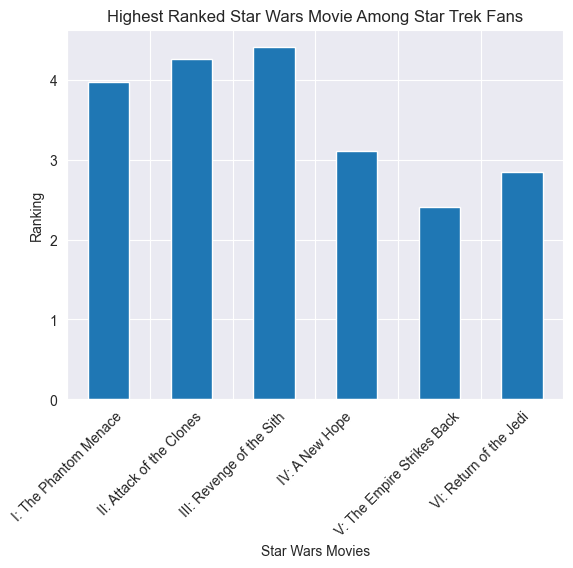

In [85]:
st_fan[st_fan.columns[9:16]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Ranking')
plt.title('Highest Ranked Star Wars Movie Among Star Trek Fans')
plt.show()

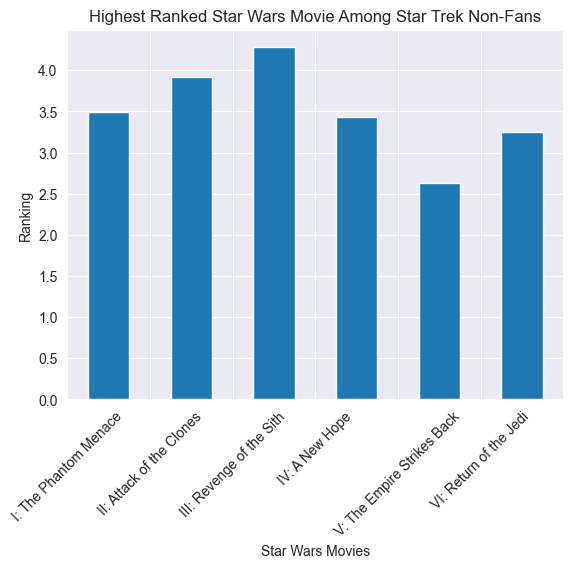

In [86]:
st_nonfan[st_nonfan.columns[9:16]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Ranking')
plt.title('Highest Ranked Star Wars Movie Among Star Trek Non-Fans')
plt.show()

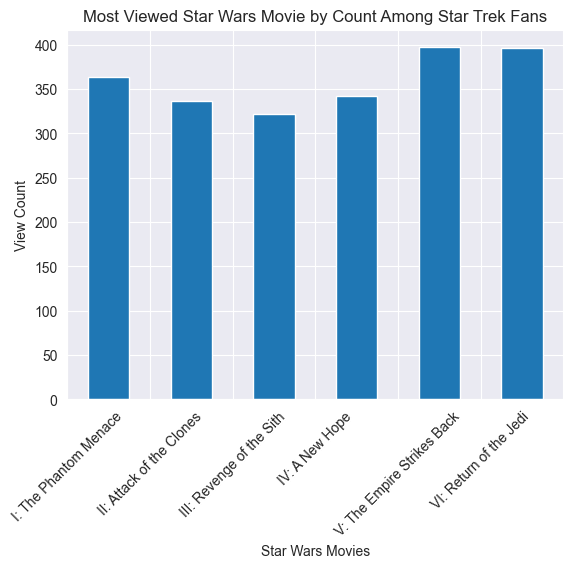

In [87]:
st_fan[st_fan.columns[3:9]].sum().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('View Count')
plt.title('Most Viewed Star Wars Movie by Count Among Star Trek Fans')
plt.show()

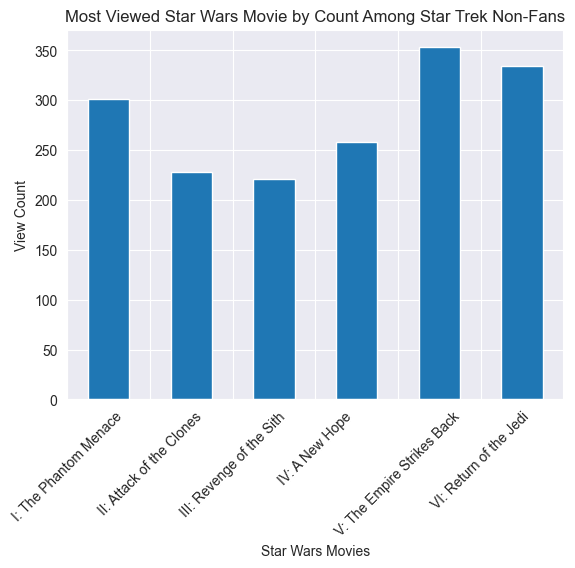

In [88]:
st_nonfan[st_nonfan.columns[3:9]].sum().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('View Count')
plt.title('Most Viewed Star Wars Movie by Count Among Star Trek Non-Fans')
plt.show()

### Rankings & Viewings between Male & Female Respondents

In [70]:
star_wars[rel_cols[2]].unique()

male = star_wars.loc[star_wars[rel_cols[2]] == 'Male']
female = star_wars.loc[star_wars[rel_cols[2]] == 'Female']

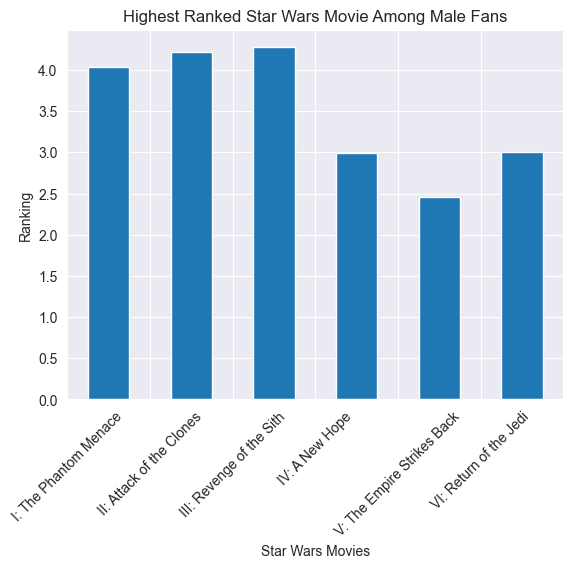

In [92]:
male[male.columns[9:16]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Ranking')
plt.title('Highest Ranked Star Wars Movie Among Male Fans')
plt.show()

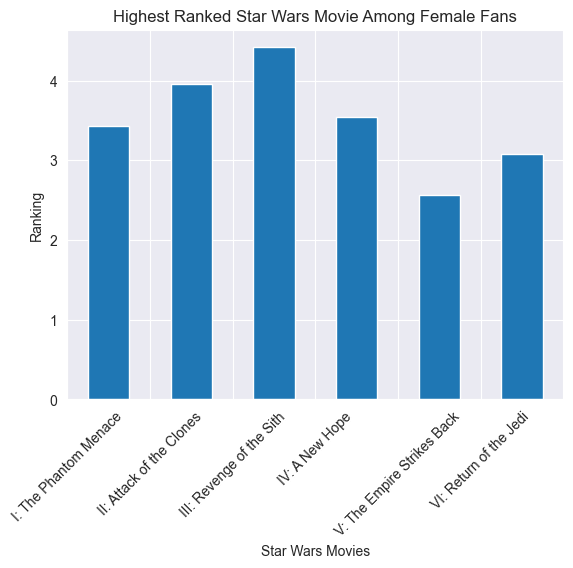

In [94]:
female[female.columns[9:16]].mean().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('Ranking')
plt.title('Highest Ranked Star Wars Movie Among Female Fans')
plt.show()

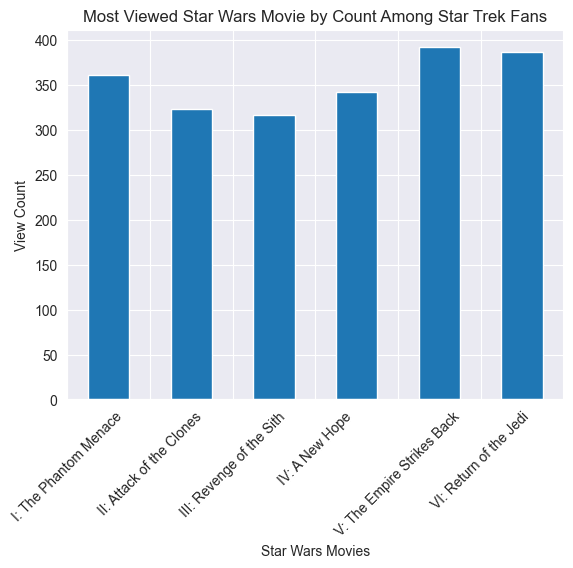

In [91]:
male[male.columns[3:9]].sum().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('View Count')
plt.title('Most Viewed Star Wars Movie by Count Among Male Fans')
plt.show()

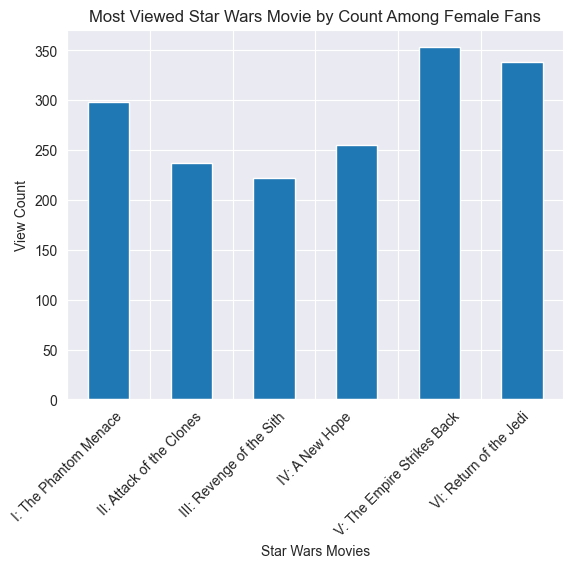

In [93]:
female[female.columns[3:9]].sum().plot(kind='bar')

xticklabels = ['I: The Phantom Menace', 'II: Attack of the Clones', 'III: Revenge of the Sith','IV: A New Hope', 'V: The Empire Strikes Back', 'VI: Return of the Jedi']
locs, labels = plt.xticks()
plt.xticks(ticks=locs-0.5, labels=xticklabels, rotation=45)

plt.xlabel('Star Wars Movies')
plt.ylabel('View Count')
plt.title('Most Viewed Star Wars Movie by Count Among Female Fans')
plt.show()

### Next Steps
Here are some potential next steps:
* Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are there any interesting patterns?
* Clean columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
* Which character do respondents like the most?
* Which character do respondents dislike the most?
* Which character is the most controversial (split between likes and dislikes)?